In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
fig = px.pie(df, names='Churn', title='percentage of Churn')
fig.show()

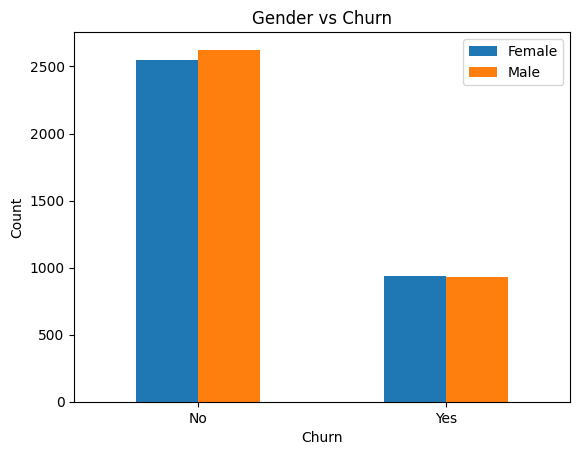

In [11]:
pd.crosstab(df['Churn'], df['gender']).plot(kind='bar')
plt.title('Gender vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.show()

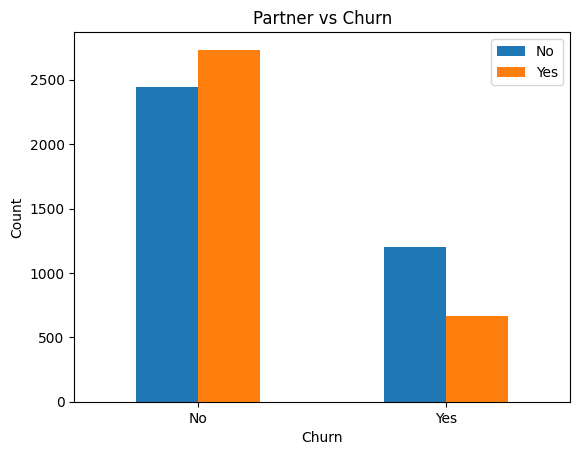

In [12]:
pd.crosstab(df['Churn'], df['Partner']).plot(kind='bar')
plt.title('Partner vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

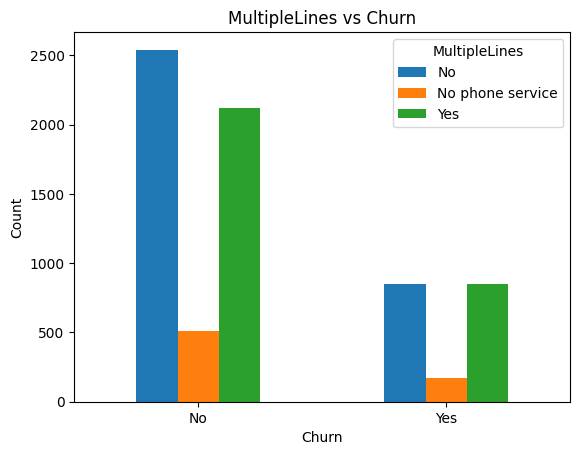

In [13]:
pd.crosstab(df['Churn'], df['MultipleLines']).plot(kind='bar')
plt.title('MultipleLines vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show

In [14]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.show()

In [15]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", barmode="group", title="<b>Customer payment method distribution<b>")
fig.show()

In [16]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df.fillna(df["TotalCharges"].mean(),inplace=True)

In [19]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df["InternetService"].describe(include=['object', 'bool'])

count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [22]:
df.describe(exclude='object')

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


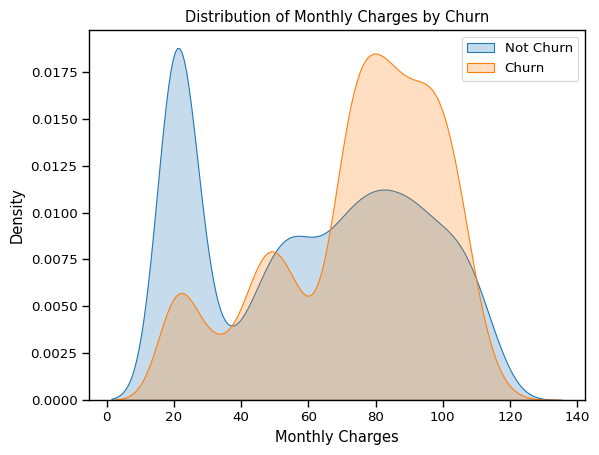

In [23]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],shade= True);
ax.set_title('Distribution of Monthly Charges by Churn')
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
plt.show()

In [24]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
def distplot(feature, frame, color='g'):
    plt.figure(figsize=(12, 7))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [27]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(0, 20)

In [28]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7043, 20)

In [29]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<Axes: >

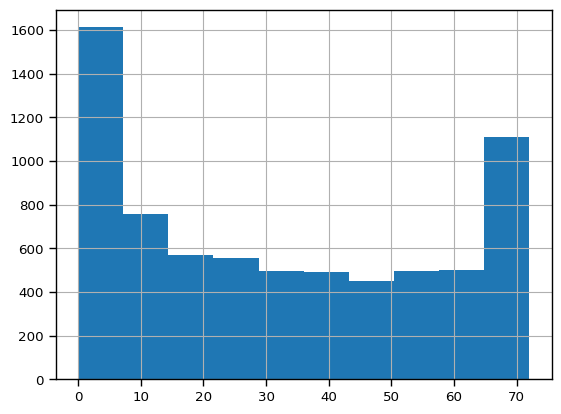

In [30]:
df.tenure.hist()

In [31]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_no

Series([], Name: tenure, dtype: int64)

In [32]:
def get_unique_values(df):
    for col in df:
        print(f'{col}:{df[col].unique()}\n')


In [33]:
get_unique_values(df)

gender:[0 1]

SeniorCitizen:[0 1]

Partner:[1 0]

Dependents:[0 1]

tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService:[0 1]

MultipleLines:[1 0 2]

InternetService:[0 1 2]

OnlineSecurity:[0 2 1]

OnlineBackup:[2 0 1]

DeviceProtection:[0 2 1]

TechSupport:[0 2 1]

StreamingTV:[0 2 1]

StreamingMovies:[0 2 1]

Contract:[0 1 2]

PaperlessBilling:[1 0]

PaymentMethod:[2 3 0 1]

MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Churn:[0 1]



In [34]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [35]:
df1.replace({'Female': 1,'Male':0,'Yes':1,'No':0},inplace=True)

In [36]:
df1['InternetService'].replace(0,'No',inplace=True)

In [37]:
df1[df1['InternetService']=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,No,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,No,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,No,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,No,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
7,0,0,0,0,10,0,1,No,2,0,0,0,0,0,0,0,3,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,0,1,0,0,6,0,1,No,0,0,0,0,2,2,0,1,2,44.40,263.05,0
7031,1,1,1,0,55,1,2,No,2,2,0,0,0,0,1,0,1,60.00,3316.10,0
7036,0,0,0,0,12,0,1,No,0,2,2,2,2,2,1,0,2,60.65,743.30,0
7038,1,0,1,1,24,1,2,No,2,0,2,2,2,2,1,1,3,84.80,1990.50,0


In [38]:
get_unique_values(df1.select_dtypes(object))

InternetService:['No' 1 2]



In [39]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod']).astype(int)
df2.shape

(7043, 27)

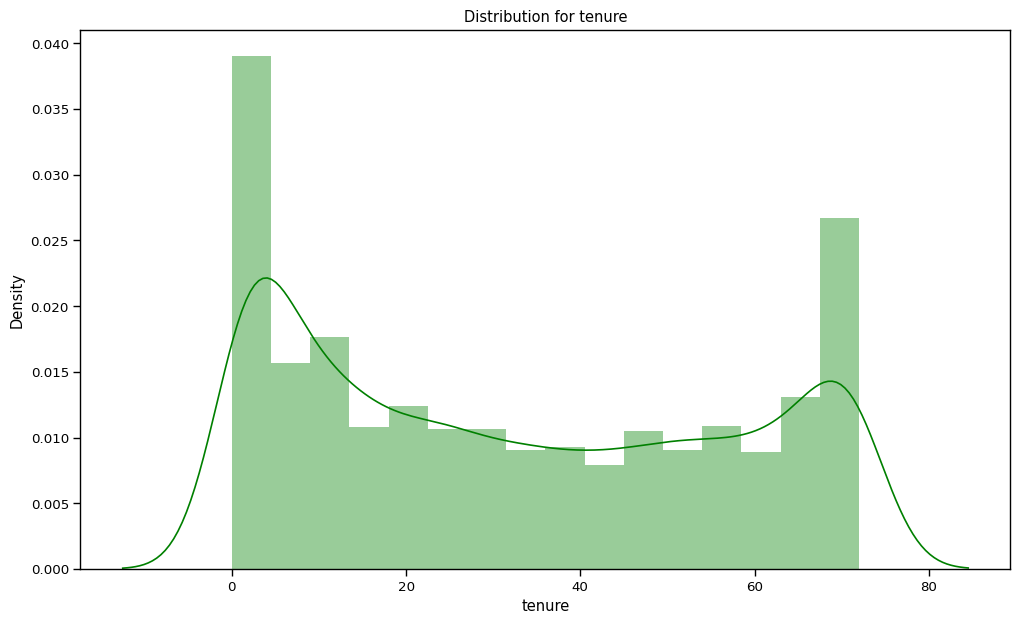

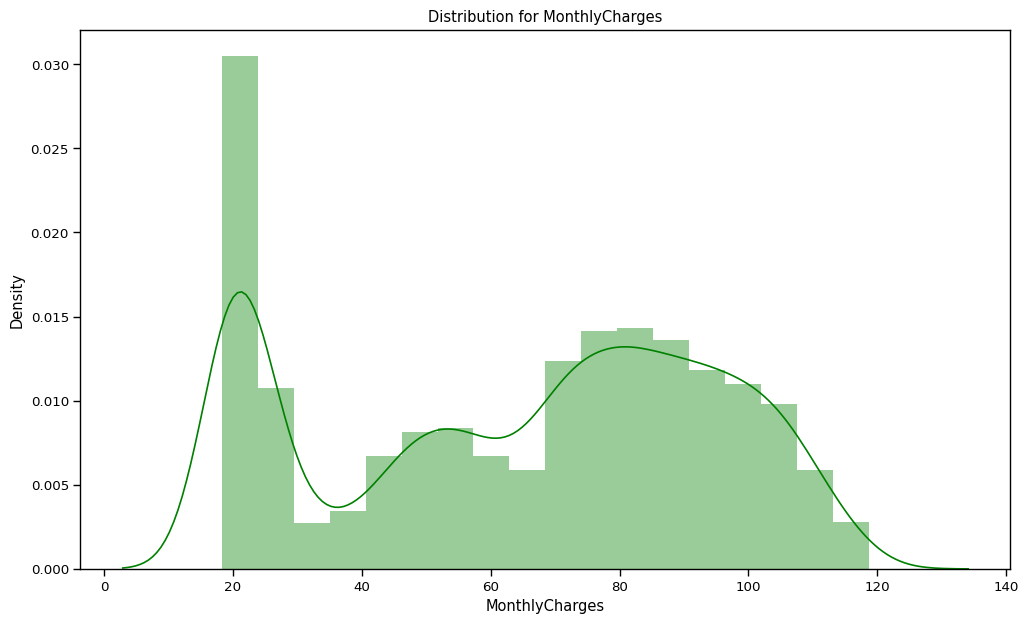

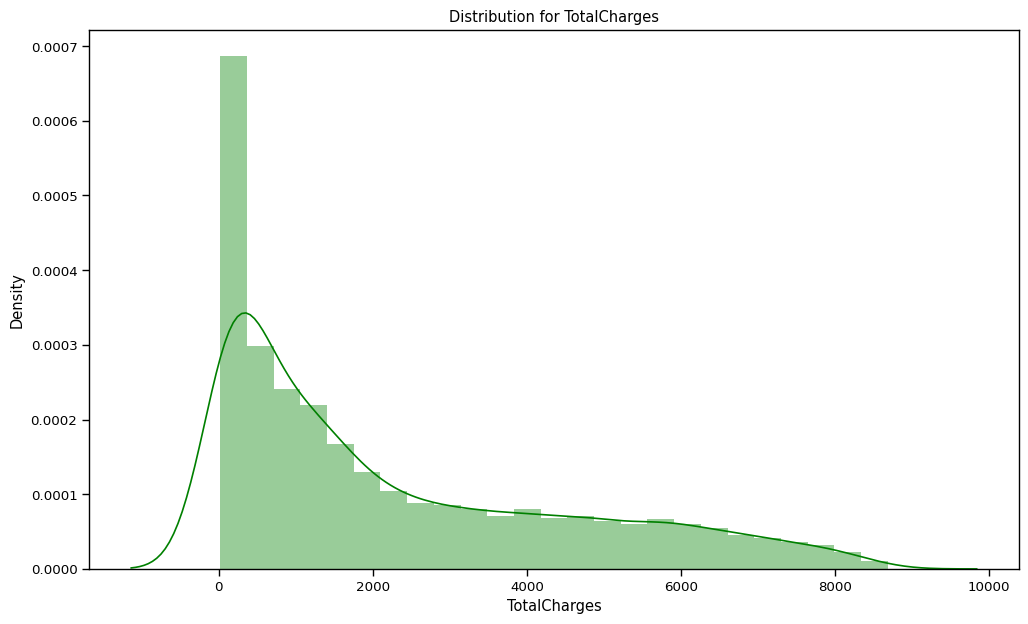

In [40]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [41]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

KNN

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7700496806245565


In [43]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1036
           1       0.64      0.31      0.41       373

    accuracy                           0.77      1409
   macro avg       0.71      0.62      0.64      1409
weighted avg       0.75      0.77      0.74      1409



RandomForestClassifier

In [44]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7970191625266146


In [45]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



LogisticRegression

In [46]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8168914123491838


In [47]:
lr_pred= lr_model.predict(X_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [48]:
from sklearn.preprocessing import MinMaxScaler
mmslr = MinMaxScaler()
df2[['MonthlyCharges','TotalCharges','tenure']] = mmslr.fit_transform(df2[['MonthlyCharges','TotalCharges','tenure']])

In [49]:
df2[['MonthlyCharges','TotalCharges','tenure','Churn']]

,MonthlyCharges,TotalCharges,tenure,Churn
0,0.11,0.001269,0.013889,0
1,0.38,0.215901,0.472222,0
2,0.35,0.010385,0.027778,1
3,0.24,0.210247,0.625000,0
4,0.52,0.015347,0.027778,1
...,...,...,...,...
7038,0.66,0.227556,0.333333,0
7039,0.85,0.847450,1.000000,0
7040,0.11,0.037849,0.152778,0
7041,0.56,0.033233,0.055556,1


In [50]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=67)
X_train.shape,X_test.shape

((5634, 26), (1409, 26))

In [52]:
from tensorflow import keras 
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])


model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs=100)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6935 - loss: 0.5648
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7887 - loss: 0.4475
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4302
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.4261
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7923 - loss: 0.4260
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4268
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4327
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7927 - loss: 0.4224
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.4142
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7932 - loss: 0.4252
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7973 - loss: 0.4185
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━

In [54]:
model.evaluate(X_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4228


[0.42708325386047363, 0.7984386086463928]

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X = df2.drop('Churn', axis=1).values
y = df2['Churn'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [57]:
class ChurnModel(nn.Module):
    def __init__(self):
        super(ChurnModel, self).__init__()
        self.fc1 = nn.Linear(26, 20) 
        self.fc2 = nn.Linear(20, 1)  
    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.sigmoid(self.fc2(x))  
        return x

model = ChurnModel()


In [58]:
criterion = nn.BCELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)  


In [59]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  
    optimizer.zero_grad() 
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6951
Epoch [20/100], Loss: 0.6540
Epoch [30/100], Loss: 0.6182
Epoch [40/100], Loss: 0.5864
Epoch [50/100], Loss: 0.5581
Epoch [60/100], Loss: 0.5334
Epoch [70/100], Loss: 0.5123
Epoch [80/100], Loss: 0.4946
Epoch [90/100], Loss: 0.4802
Epoch [100/100], Loss: 0.4687


In [60]:
model.eval()  
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).float()
    accuracy = (predicted_classes.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
    print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7921
